<h1 style="text-align:center">Second-order System Responses</h1>
<h3 style="text-align:center">MCHE474: Control Systems</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
<a href="http://www.ucs.louisiana.edu/~jev9637/">http://www.ucs.louisiana.edu/~jev9637/</a></p>

In this notebook, we'll examine the response of a second-order system, along with some performance measures for such systems. We'll use the [Control System Library](http://python-control.readthedocs.io/en/latest/index.html) and work in in the classical control domain

## Notebook Imports

As usual, we'll start by importing the libraries we'll need to work.  These include [NumPy](http://www.numpy.org), [matplotlib](https://matplotlib.org) for plotting, and the Control Systems Library itself. The code cells here will appear unchanged in most of the notebooks we'll use in *MCHE474*.

We first import `numpy` and give it a "nickname" `np`. In doing so, we can preface calls to all NumPy functions with `np.` rather than having to type `numpy.`. This is a common convention in the use of NumPy. We say that we have imported NumPy into the namespace `np`. I'm oversimplifying a bit, but having different namespaces allows libraries to have functions of the same name, since all calls to the library or module  will include the namespace information.

In [1]:
# Grab all of the NumPy functions with namespace np
import numpy as np              

Next, we'll import matplotlib. This is another cell that will show up unchanges in nearly every Notebook that we do in *MCHE474*. The `%matplotlib inline` command tells the Notebook to include the plots inline with it, rather than plotting them in a seperate window. We import the `matplotlib.pyplot` module into the namepace `plt`. As you'll see, this means that nearly all of our plotting commands are prefixed by `plt.`.

In [2]:
%matplotlib inline

# Import the plotting functions 
import matplotlib.pyplot as plt

Finally we'll import the Control Systems Library. We don't specify a shorthand namespace, so we'll need to preface any commands from it with `control.`.

In [3]:
import control # This will import the control library.  

Now that we've imported the necessary libraries, let's walk through the basic response of second-order systems, roughly mirroring Section5.3 of  [*Modern Control Systems (13th Edition)* by Richard Dorf and Robert Bishop](http://amzn.com/0134407628), the current (as of Fall 2017) textbook for *MCHE474*.

## Working with Transfer Functions

When working in the  Laplace (or "s") domain will be modeling our systems using their transfer functions. The Control Systems Library has numerous tools to help us define, analyze, and simulate our system in this domain. Let's explore those now.

### Defining Transfer Functions
To define a transfer function, we need to provide its numerator and denominator to the  `tf()` function of the library. To do so, we'll define the numerator and denominator at 1D arrays, where the power of `s` is indicated by the postition of the constant in the array.

The second-order system we'll look at is:

$ \quad G(s) =  \frac{Y(s)}{R(s)} = \frac{1}{ms^2 + cs + k} $

Like the time-domain solution, we can also write this transfer function in terms of the natural frquency, $\omega_n$, and damping ratio, $\zeta$, of the system:

$ \quad G(s) = \frac{Y(s)}{R(s)} = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2} $

We'll first define an array, which we'll call `num` that contains the numerator value. Since it only has one value, the command will be of the form:

    num = [w_n**2]

To define the denominator, we need to create an array where the element represents the power of `s` for the constant there. In this case:

    den = [1, 2 * zeta * w_n, w_n**2]

To check this, work from the "right" side of the definition. `w_n**2` is $\omega_n^2$, which is mulitplied by $s^0$. The next element is `2 * zeta * w_n`, which is the $2\zeta\omega_n$ term and given its position in the first indexed element of the array is multiplied by $s^1$. This continues for all similar definitions.

***Note:*** This is one difference between Python and MATLAB. In Python, the commas are always needed between elements. In MATLAB, they are (sometimes) optional.

In [4]:
# Define the natural frequency. We use the numpy sqrt function, so we need to preface its call with np.
w_n = np.sqrt(2)    

# Define the damping ratio. 
zeta = 1 / (2 * np.sqrt(2))

# Define the numerator and denominator of the transfer function
num = [w_n**2]
den = [1, 2 * zeta * w_n, w_n**2]

Now, that these are defined, we can pass them to the `tf` function of the library. Remember that since `tf` is a function in the `control` module, we need to use `control.tf()` to call it. We'll assign the variable `sys` to hold transfer function returned. 

In [5]:
# Define the transfer function form of the system defined by num and den
sys = control.tf(num, den)

We can check that the transfer function is defined correctly by printing `sys`.

In [6]:
print(sys)


     2
-----------
s^2 + s + 2



### Analysis of the System
Now that the system's transfer function is defined, we can use many of the analysis tools in the library. We can calculate the poles by

In [7]:
sys.pole()

array([-0.5+1.32287566j, -0.5-1.32287566j])

and the zeros by 

In [8]:
sys.zero()

array([], dtype=float64)

which, as we should expect returns an empty array indicating that there are no zeros for this transfer function.

We can plot a (not so pretty) pole-zero map by:

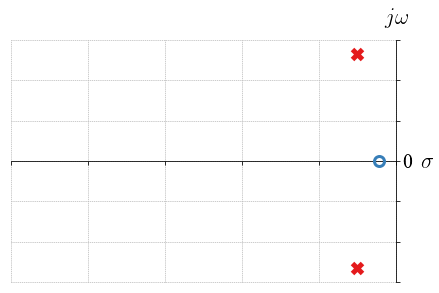

In [104]:
a = 0.22
sys2 = control.tf([1/a, 1],[1])

poles, zeros = control.pzmap.pzmap(sys*sys2, Plot=False)

# Let's plot the pole-zero map with better formatting than the stock command would

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_position('zero')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('right')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('$\sigma$', family='serif', fontsize=22, weight='bold', labelpad=5)
ax.xaxis.set_label_coords(1.08, .54)


plt.ylabel('$j\omega$', family='serif', fontsize=22, weight='bold', rotation=0, labelpad=10)
ax.yaxis.set_label_coords(1, 1.05)


plt.plot(np.real(poles), np.imag(poles), linestyle='', 
         marker='x', markersize=10, markeredgewidth=5, 
         zorder = 10, label=r'Poles')

plt.plot(np.real(zeros), np.imag(zeros), linestyle='', 
         marker='o', markersize=10, markeredgewidth=3, markerfacecolor='none', 
         zorder = 10, label=r'Zeros')


# uncomment below and set limits if needed
plt.xlim(-5, 0)
# plt.ylim(0, 10)

plt.xticks([-5,-4,-3,-2,-1,0],['','','','','',''], bbox=dict(facecolor='black', edgecolor='None', alpha=0.65 ))
plt.yticks([-1.5, -1.0, -0.5, 0, 0.5, 1, 1.5],['','', '', '0', '','',''])

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
plt.savefig('MCHE474_ExtraZero_PoleZeroMap.pdf')

# fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

In [95]:
ax.yaxis.set_ticks_position?

There are [many others](http://python-control.readthedocs.io/en/latest/control.html#control-system-analysis) that we'll learn about in later notebooks. We can also simulate system responses using the transfer function directly, allowing us to avoid analytically solving the system ODEs.

### Simluation Using the Transfer Function
The library has [functions defined](http://python-control.readthedocs.io/en/latest/control.html#time-domain-simulation) that allow us to *very* easily simulate system responses to initial conditions, impulses, and step inputs. We also, with just a little bit more work, simulate the response to arbitrary inputs of our choosing.

#### Responses to Initial Conditions
The function to simulate a response to initial conditions is:

    control.initial_response()

We have to pass the system to it and have the option to pass several other parameters, including the time array and the initial condition itself. The initial condition has to include *all* of the states of the system, so we need to define a array to hold them by:

    sys_init = [0, 0.15]

The function returns a time array and the output(s) of the system.

You can get more information [here](http://python-control.readthedocs.io/en/latest/generated/control.initial_response.html#control.initial_response).

For our system, the call to this function is:

In [17]:
# Define the initial conditions for the system.
# Here they are the initial velocity and position of the mass
sys_init = [0, 0.15]      

time_out, response = control.initial_response(sys, t, sys_init)

In this call, we store the output (the response itself) in the array named `response` and the time vector returned by the function in array `time_out`. We now can plot this reponse using those two arrays. It should match the response that we plotted above using the analytical solution.

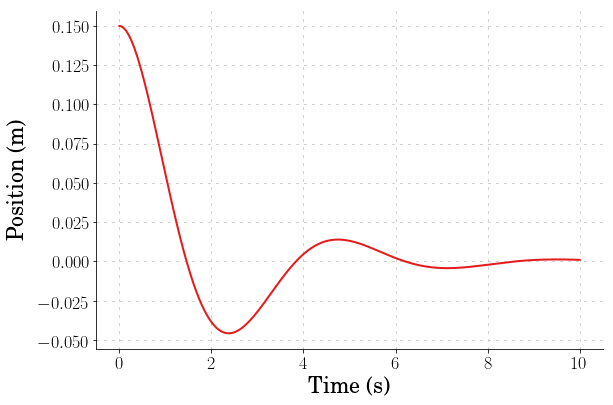

In [18]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position (m)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(time_out, response, linewidth=2, linestyle='-', label=r'Response')

# uncomment below and set limits if needed
# plt.xlim(0, 5)
# plt.ylim(0, 10)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE474_initial_response.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

### Impulse Response
We can also plot the response of the system to an impulse. The function to do so is 

    control.impulse_response()
    
which has a similar form to the one we used for the initial condition response above. For this system, the call is:

In [19]:
time_imp, impulse_response = control.impulse_response(sys, t)

As before, we can now plot this response using the arrays returned by the function.

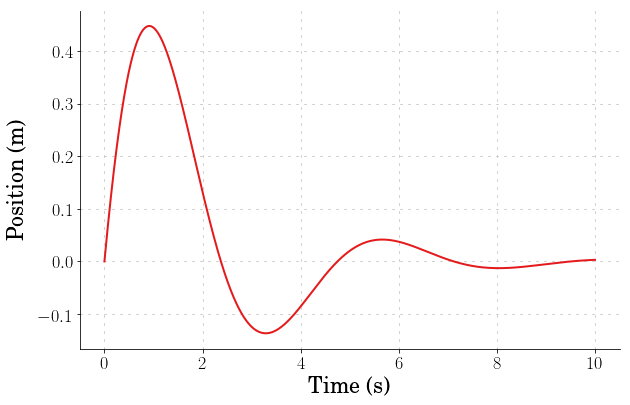

In [20]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position (m)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(time_imp, impulse_response, linewidth=2, linestyle='-', label=r'Response')


# uncomment below and set limits if needed
# plt.xlim(0, 5)
# plt.ylim(0, 10)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE474_impulse_response.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

#### Step Response
The function to simluate the system response to a step input follows the same patterns as the initial condition and impulse response functions. As you might expect, it is:

    control.step_response()

where we have to pass the system and have the option of passing other information. More information on it can be found [here](http://python-control.readthedocs.io/en/latest/generated/control.step_response.html#control.step_response).

For the mass-spring-damper system, let's simulate a step response with zero initial conditions (*i.e.* The system is at rest when the input is applied.)

To do this, we issue the command:

In [21]:
time_step, step_response = control.step_response(sys, t)

As before, we can now plot this reponse using the arrays returned.

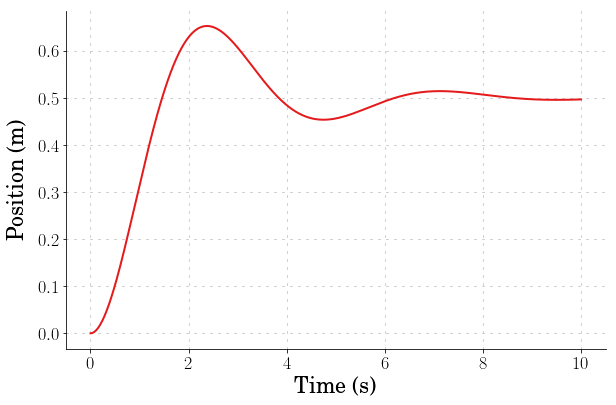

In [22]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position (m)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(time_step, step_response, linewidth=2, linestyle='-', label=r'Response')

# uncomment below and set limits if needed
# plt.xlim(0, 5)
# plt.ylim(0, 10)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE474_step_response.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

#### Forced Response
The function to simluated a forced response looks similar, but is just *slightly* more complex since we have to propoerly define the input ourselves. We'll investigate its use in more detail in another Notebook.

<hr>


#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [23]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
import codecs
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(codecs.open(css_file, 'r', 'utf-8').read())